In [1]:
#import packages and formatting statements

import numpy as np
import math
# !pip install matplotlib
from matplotlib import pyplot as plt
# !pip install astropy==5.3
import astropy.io.fits as pyfits
from astropy.table import Table, join, Column
from astropy.wcs import WCS
from astropy.io import ascii
import os
from astropy.coordinates import SkyCoord, Angle
from astropy.nddata import Cutout2D
import astropy.units as u
from astropy.visualization.wcsaxes import SphericalCircle
from matplotlib.patches import Circle
from reproject import reproject_interp

import sys
sys.path.append('./Python')
from CheckInImage import check_in_image
from AngularSize import findAngSize

plt.rc('text',usetex=False)
fontsize=10
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

ext="HA_FLUX_CORR"

In [2]:
# Compile galaxy and sne data
data = Table.read('../Data/1.GroupedSampleData.csv', format='csv')

data[0:12]

col0,galaxy,distance,gal_ra,gal_dec,pos_ang,incl,nat_res,r_eff,maps_musedap,maps_nat,maps_150,maps_1kpc,maps_HII,maps_irac,maps_CO21,maps_eCO21,maps_CO_fine,maps_eCO_fine,maps_ext,maps_vdisp,maps_HST,JWST200,JWST300,JWST335,JWST360,JWST770,JWST1000,JWST1130,JWST2100,sn_name,sn_type,sn_ra,sn_dec
int64,str7,float64,float64,float64,float64,float64,float64,float64,str71,str58,str64,str63,str50,str40,str72,str73,str72,str73,str36,str32,str41,str101,str101,str101,str101,str101,str102,str102,str102,str82,str50,str127,str132
0,NGC1087,15.85,41.60492,-0.498717,359.1,42.9,0.92,42.091877,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1087-0.92asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1087_sfr.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1087_sfr_150pc.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1087_sfr_1kpc.fits,../Data/HII_reg_masks/NGC1087_nebulae_mask_V2.fits,../Data/IRAC/ngc1087_irac1_atGauss4.fits,../../GalaxyFiles/ALMACO2-1/ngc1087_12m+7m+tp_co21_150pc_broad_mom0.fits,../../GalaxyFiles/ALMACO2-1/ngc1087_12m+7m+tp_co21_150pc_broad_emom0.fits,../../GalaxyFiles/ALMACO2-1/ngc1087_12m+7m+tp_co21_120pc_broad_mom0.fits,../../GalaxyFiles/ALMACO2-1/ngc1087_12m+7m+tp_co21_120pc_broad_emom0.fits,../Data/SFR_v1/NGC1087_MAPS_sfr.fits,../Data/vdisp/ngc1087_vdisp.fits,../../GalaxyFiles/HST/ngc1087_hst_ha.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_nircam_lv3_f200w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_nircam_lv3_f300m_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_nircam_lv3_f335m_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_nircam_lv3_f360m_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_miri_lv3_f770w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_miri_lv3_f1000w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_miri_lv3_f1130w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1087_miri_lv3_f2100w_i2d_anchor_atgauss0p85.fits,['SN1995V'],['II'],[41.61152777777777],[-0.4987861111111111]
1,NGC1300,18.99,49.920815,-19.411114,278.0,31.8,0.89,70.87826,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1300-0.89asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1300_sfr.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1300_sfr_150pc.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1300_sfr_1kpc.fits,../Data/HII_reg_masks/NGC1300_nebulae_mask_V2.fits,../Data/IRAC/ngc1300_irac1_atGauss4.fits,../../GalaxyFiles/ALMACO2-1/ngc1300_12m+7m+tp_co21_150pc_broad_mom0.fits,../../GalaxyFiles/ALMACO2-1/ngc1300_12m+7m+tp_co21_150pc_broad_emom0.fits,../../GalaxyFiles/ALMACO2-1/ngc1300_12m+7m+tp_co21_120pc_broad_mom0.fits,../../GalaxyFiles/ALMACO2-1/ngc1300_12m+7m+tp_co21_120pc_broad_emom0.fits,../Data/SFR_v1/NGC1300_MAPS_sfr.fits,../Data/vdisp/ngc1300_vdisp.fits,../../GalaxyFiles/HST/ngc1300_hst_ha.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_nircam_lv3_f200w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_nircam_lv3_f300m_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_nircam_lv3_f335m_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_nircam_lv3_f360m_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_miri_lv3_f770w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_miri_lv3_f1000w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_miri_lv3_f1130w_i2d_anchor_atgauss0p85.fits,../../GalaxyFiles/JWSTLargeFiles/ngc1300_miri_lv3_f2100w_i2d_anchor_atgauss0p85.fits,['SN2022acko'],['II'],[49.91245833333333],[-19.39518888888889]
2,NGC1365,19.57,53.40152,-36.140404,201.1,55.4,1.15,29.30388,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC1365-1.15asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1365_sfr.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1365_sfr_150pc.fits,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC1365_sfr_1kpc.fits,../Data/HII_reg_masks/NGC13

In [25]:
    
# get plot information for main image maps for the zooms
def getPlotStuff(gal, img, HSTimg, HIIimg, CO21Img, eCO21Img, IRACimg, JWST200,JWST300,JWST335,JWST360,JWST770,JWST1000,JWST1130,JWST2100, names, types, ras, decs, dists, ext):
    if os.path.isfile(img) and os.path.isfile(HIIimg):

        #get hdu & wcs for MUSE map
        ha_hdu = pyfits.open(img)
        hdus = ha_hdu
        ha_map = ha_hdu[ext].data
        w = WCS(ha_hdu[ext].header, naxis=2)

        #get HII maps
        hii_hdu = pyfits.open(HIIimg)
        hii_map = hii_hdu[0].data

        #get HST map
        if os.path.isfile(HSTimg):
            hst_hdu = pyfits.open(HSTimg)
            hst_map = hst_hdu[0].data
            wHST = WCS(hst_hdu[0].header, naxis=2)
            hHST = hst_hdu
            hii_hst, footprint = reproject_interp(hii_hdu, hst_hdu[0].header)
        else: 
            hst_map = np.full_like(ha_map, fill_value = float("NaN"))
            hii_hst = np.full_like(ha_map, fill_value = float("NaN")) 
            wHST = float("NaN")
            hHST = float("NaN")

        # get CO contour map 
        if gal == "NGC1672":
            co_img = "../../GalaxyFiles/ALMACO2-1/ngc1672_12m+7m+tp_co21_150pc_broad_mom0.fits"
            co_err = "../../GalaxyFiles/ALMACO2-1/ngc1672_12m+7m+tp_co21_150pc_broad_emom0.fits"
        else:
            co_img = CO21Img
            co_err = eCO21Img

        co_hdu       = pyfits.open(co_img)
        eco_hdu      = pyfits.open(co_err)
        irac_hdu     = pyfits.open(IRACimg)
        jwst200_hdu  = pyfits.open(JWST200)
        jwst300_hdu  = pyfits.open(JWST300)
        jwst335_hdu  = pyfits.open(JWST335)
        jwst360_hdu  = pyfits.open(JWST360)
        jwst770_hdu  = pyfits.open(JWST770)
        jwst1000_hdu = pyfits.open(JWST1000)
        jwst1130_hdu = pyfits.open(JWST1130)
        jwst2100_hdu = pyfits.open(JWST2100)
        
        wcsJWST200 = WCS(jwst200_hdu[1].header, naxis=2)
        wcsJWST300 = WCS(jwst300_hdu[1].header, naxis=2)
        wcsJWST335 = WCS(jwst335_hdu[1].header, naxis=2)
        wcsJWST360 = WCS(jwst360_hdu[1].header, naxis=2)
        wcsJWST770 = WCS(jwst770_hdu[1].header, naxis=2)
        wcsJWST1000 = WCS(jwst1000_hdu[1].header, naxis=2)
        wcsJWST1130 = WCS(jwst1130_hdu[1].header, naxis=2)
        wcsJWST2100 = WCS(jwst2100_hdu[1].header, naxis=2)
        wcsIrac = WCS(irac_hdu[0].header, naxis=2)



        # reproject onto Halpha map
        co_repro_hdu,       footprint  = reproject_interp(co_hdu, ha_hdu[ext].header)
        eco_repro_hdu,      footprint  = reproject_interp(eco_hdu, ha_hdu[ext].header)
#         irac,     footprint  = reproject_interp(irac_hdu, ha_hdu[ext].header)
#         jwst200,  footprint  = reproject_interp(jwst200_hdu, ha_hdu[ext].header)
#         jwst300,  footprint  = reproject_interp(jwst300_hdu, ha_hdu[ext].header)
#         jwst335,  footprint  = reproject_interp(jwst335_hdu, ha_hdu[ext].header)
#         jwst360,  footprint  = reproject_interp(jwst360_hdu, ha_hdu[ext].header)
#         jwst770,  footprint  = reproject_interp(jwst770_hdu, ha_hdu[ext].header)
#         jwst1000, footprint  = reproject_interp(jwst1000_hdu, ha_hdu[ext].header)
#         jwst1130, footprint  = reproject_interp(jwst1130_hdu, ha_hdu[ext].header)
#         jwst2100, footprint  = reproject_interp(jwst2100_hdu, ha_hdu[ext].header)
        irac = irac_hdu[0].data
        jwst200 = jwst200_hdu[1].data
        jwst300 = jwst300_hdu[1].data
        jwst335 = jwst335_hdu[1].data
        jwst360 = jwst360_hdu[1].data
        jwst770 = jwst770_hdu[1].data
        jwst1000 = jwst1000_hdu[1].data
        jwst1130 = jwst1130_hdu[1].data
        jwst2100 = jwst2100_hdu[1].data
                
        # set up CO21 s/n map 
        co_map = co_repro_hdu
        err_map = eco_repro_hdu
        err_map = np.clip(err_map,0.01,np.max(err_map))
        sig_map = co_map / err_map

    else:
        print("no file for ")
        pass

    return(ha_map, co_map, err_map, sig_map, w, wcsIrac, wcsJWST200, wcsJWST300, wcsJWST335, wcsJWST360, wcsJWST770, wcsJWST1000, wcsJWST1130, wcsJWST2100, hii_map, hst_map, hii_hst, irac,jwst200,jwst300,jwst335,jwst360,jwst770,jwst1000,jwst1130,jwst2100,hdus, wHST, hHST, dists)


Set OBSGEO-B to     9.622808 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660472184.749 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.629518 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660409354.349 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.605143 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660637438.040 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.606654 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660623306.393 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.608122 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660609583.016 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.610127 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660590830.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


/var/folders/db/q76d94y56zscb4zzdy5ffbm80000gn/T/ipykernel_14521/927185731.py:23: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(plots)


<Figure size 640x480 with 0 Axes>

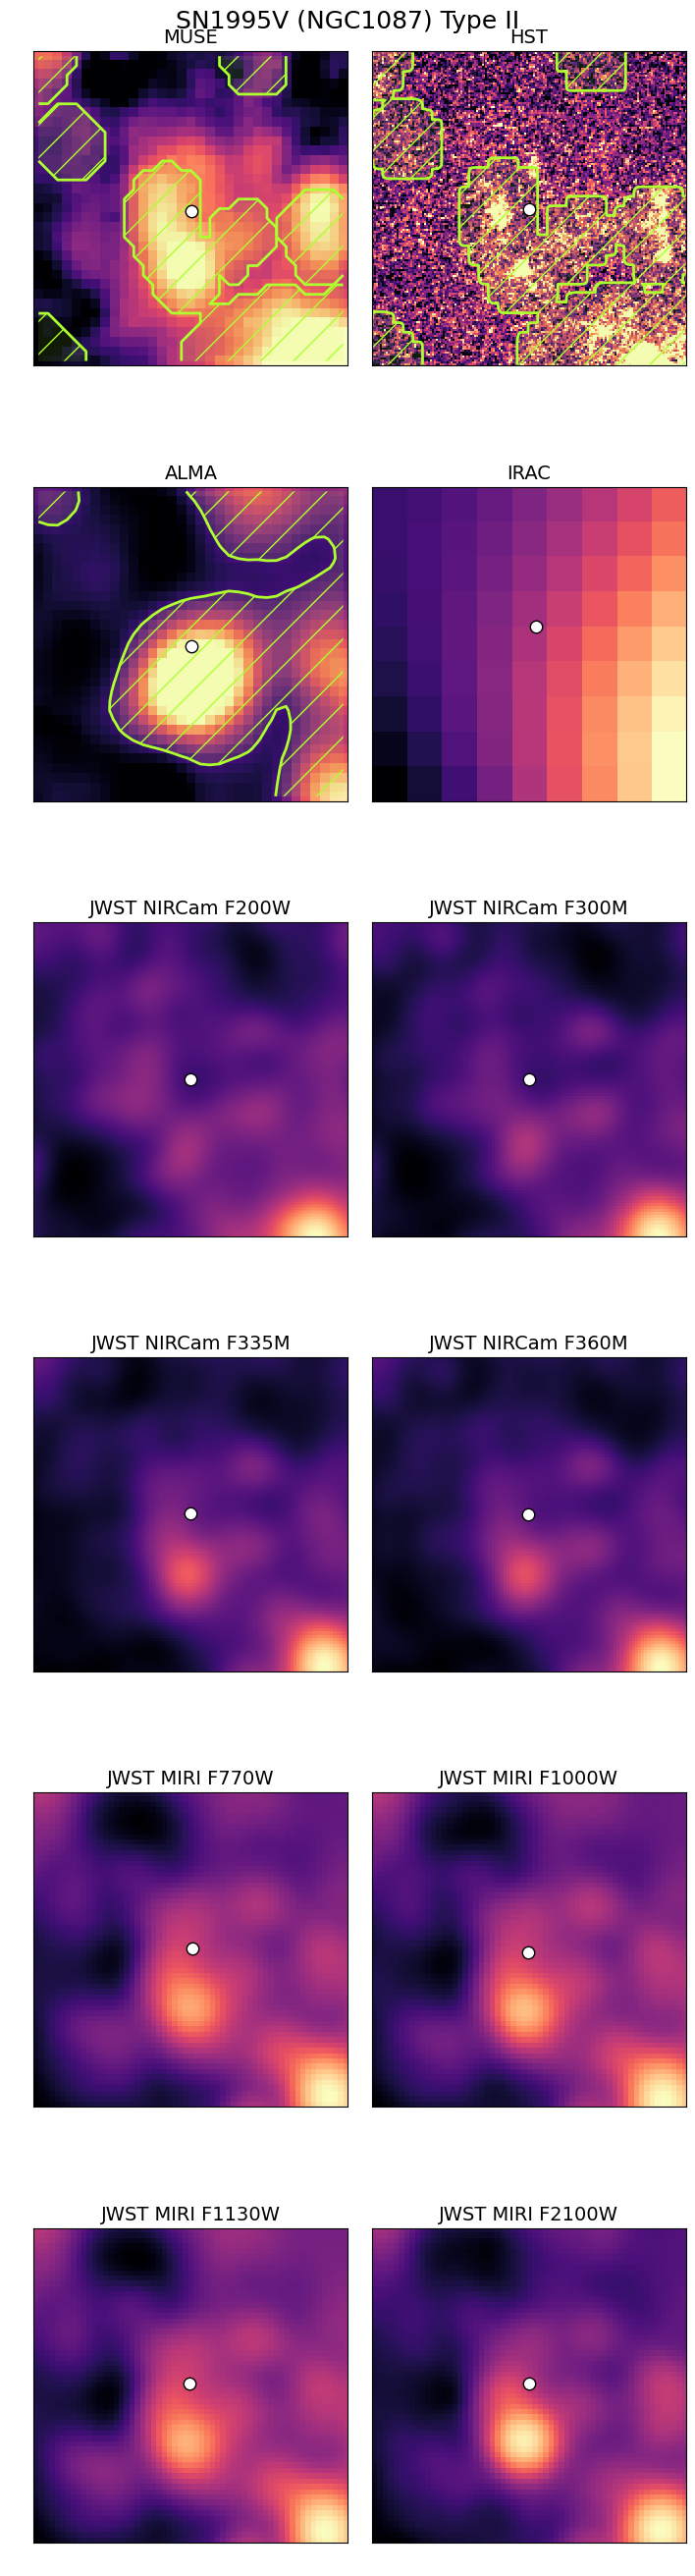

Set OBSGEO-B to     9.671939 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660011288.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.676112 from OBSGEO-[XYZ].
Set OBSGEO-H to 1659972038.587 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.678675 from OBSGEO-[XYZ].
Set OBSGEO-H to 1659947925.932 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.636318 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660345652.212 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.637859 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660331204.369 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.639320 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660317512.853 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     9.641306 from OBSGEO-[XYZ].
Set OBSGEO-H to 1660298892.766 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


/var/folders/db/q76d94y56zscb4zzdy5ffbm80000gn/T/ipykernel_14521/927185731.py:23: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(plots)


<Figure size 640x480 with 0 Axes>

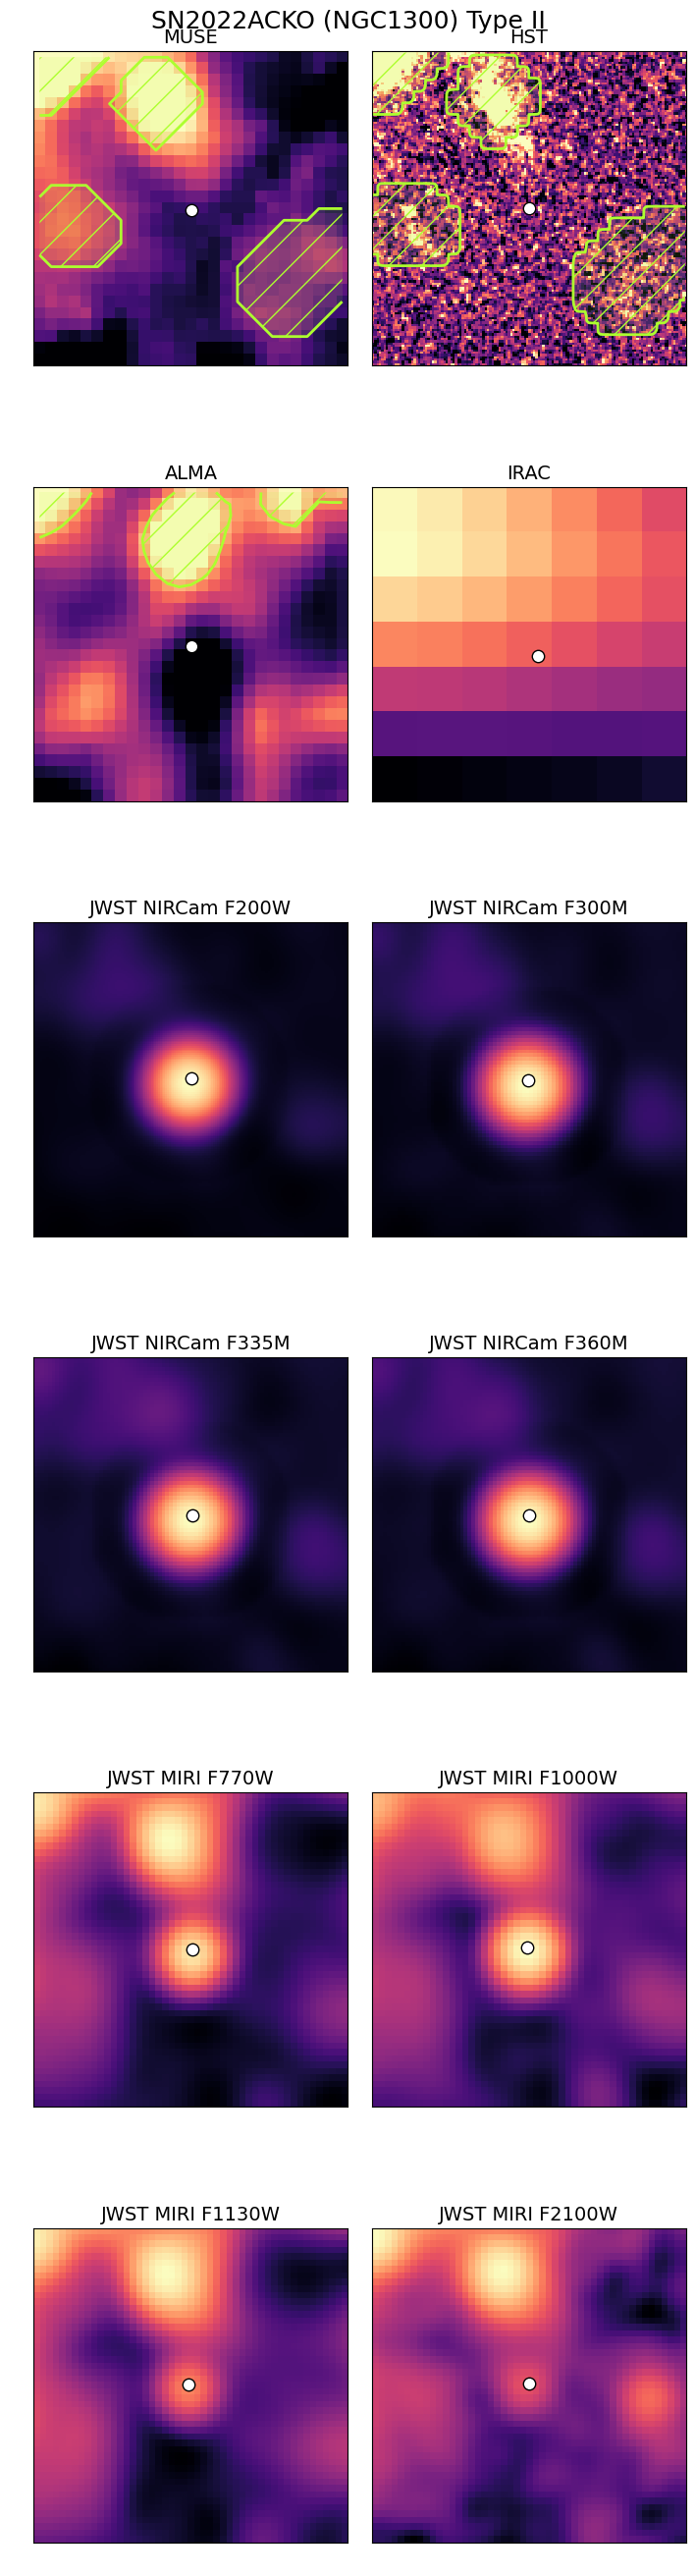

Set OBSGEO-B to   -29.445531 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645675807.343 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.436489 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645548599.745 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.430974 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645470986.937 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.524005 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646777169.436 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.520620 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646729756.762 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.516851 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646676963.151 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.512030 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646609408.623 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


/var/folders/db/q76d94y56zscb4zzdy5ffbm80000gn/T/ipykernel_14521/927185731.py:23: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(plots)


<Figure size 640x480 with 0 Axes>

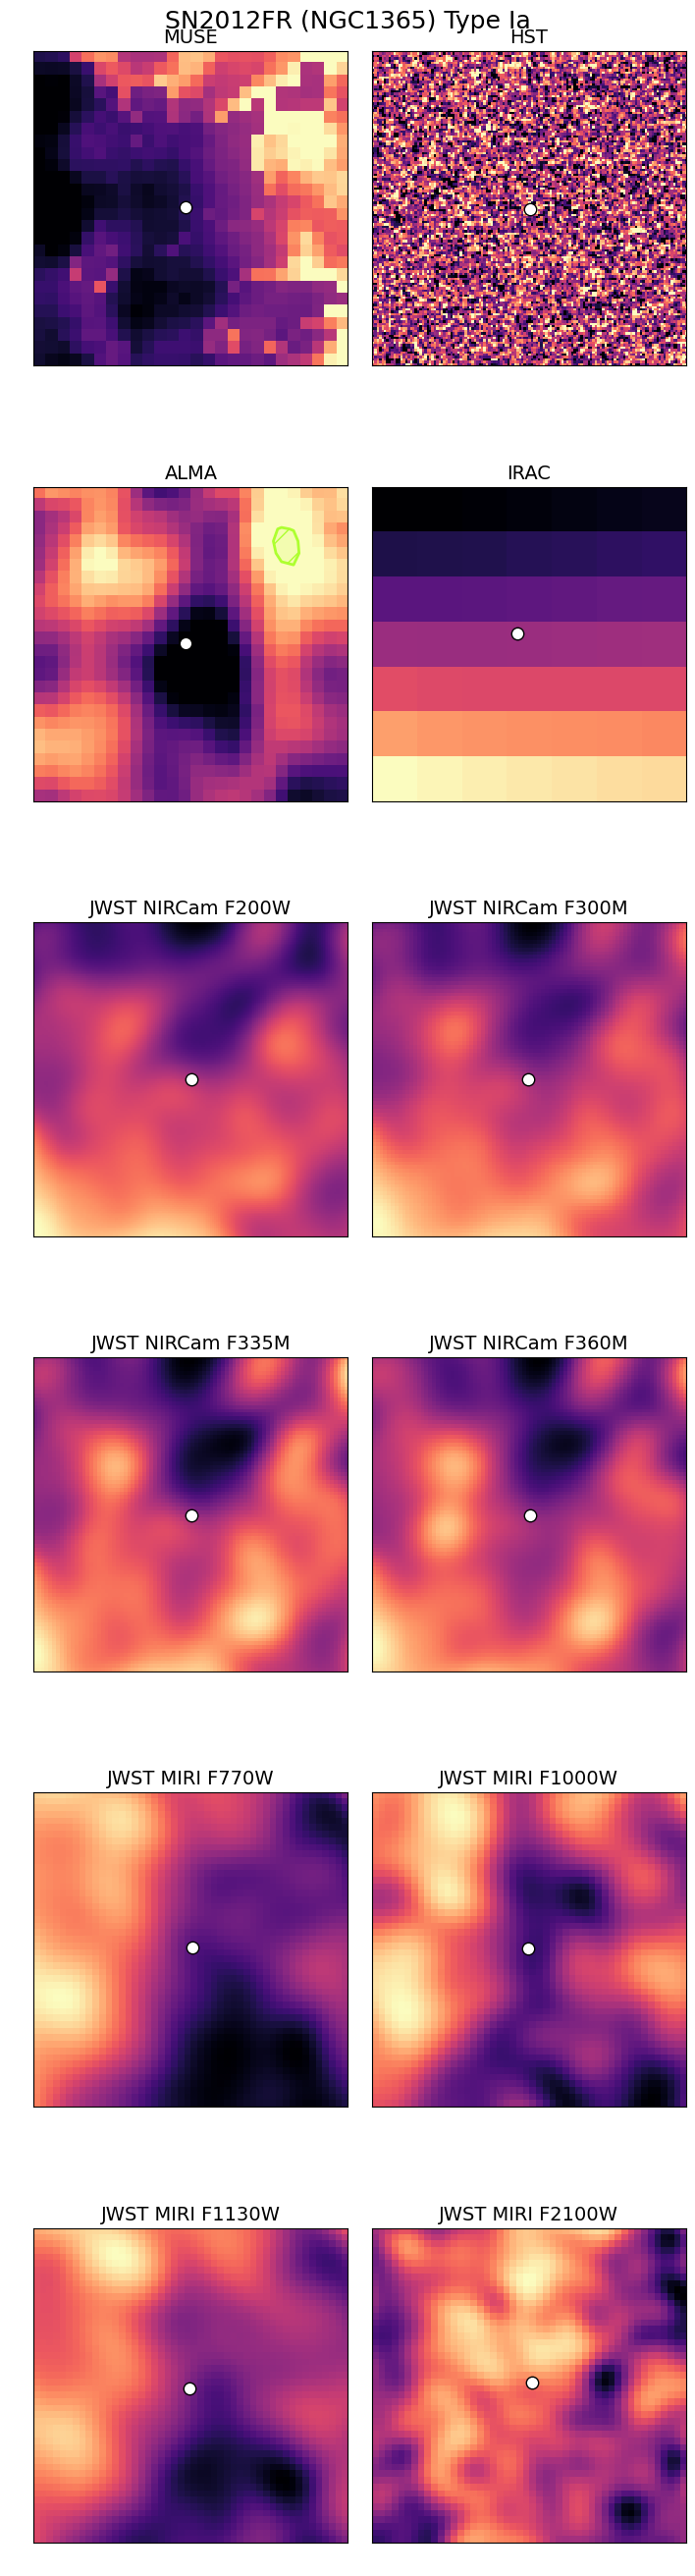

Set OBSGEO-B to   -29.445531 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645675807.343 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.436489 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645548599.745 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.430974 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645470986.937 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.524005 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646777169.436 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.520620 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646729756.762 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.516851 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646676963.151 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.512030 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646609408.623 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


/var/folders/db/q76d94y56zscb4zzdy5ffbm80000gn/T/ipykernel_14521/927185731.py:23: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(plots)


<Figure size 640x480 with 0 Axes>

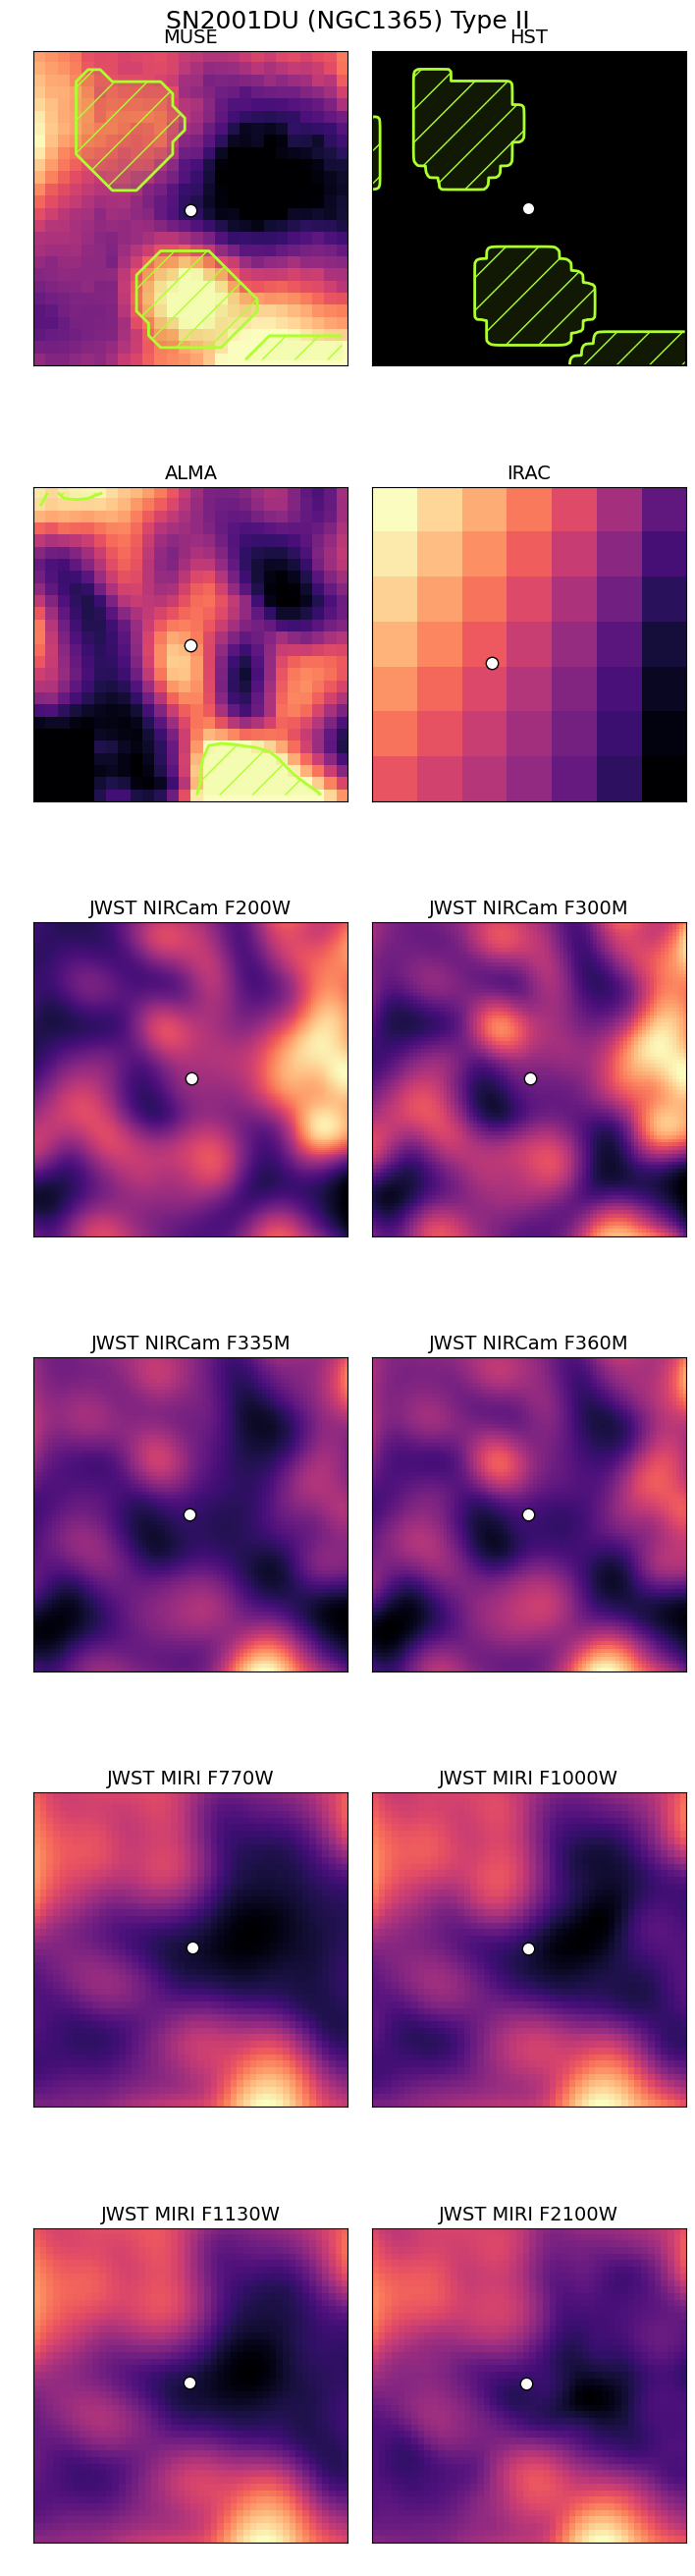

Set OBSGEO-B to   -29.445531 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645675807.343 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.436489 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645548599.745 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.430974 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645470986.937 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.524005 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646777169.436 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.520620 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646729756.762 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.516851 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646676963.151 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.512030 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646609408.623 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


/var/folders/db/q76d94y56zscb4zzdy5ffbm80000gn/T/ipykernel_14521/927185731.py:23: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(plots)


<Figure size 640x480 with 0 Axes>

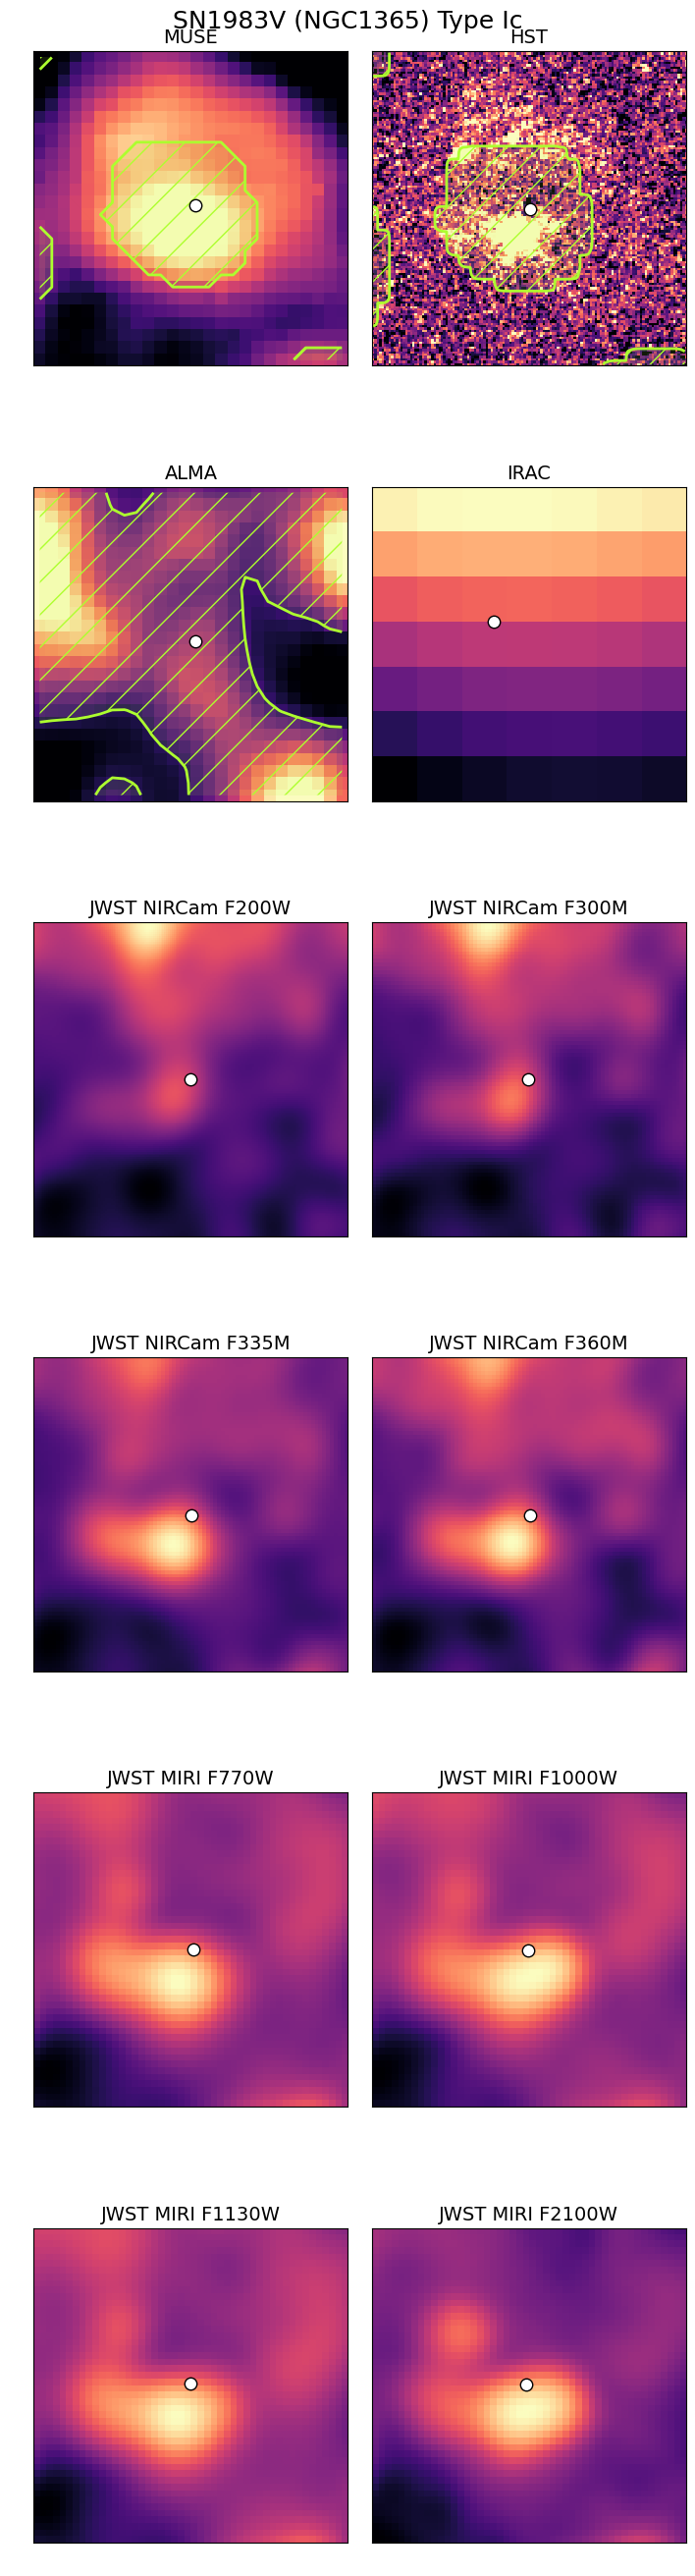

Set OBSGEO-B to   -29.445531 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645675807.343 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.436489 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645548599.745 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.430974 from OBSGEO-[XYZ].
Set OBSGEO-H to 1645470986.937 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.524005 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646777169.436 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.520620 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646729756.762 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.516851 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646676963.151 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.512030 from OBSGEO-[XYZ].
Set OBSGEO-H to 1646609408.623 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


/var/folders/db/q76d94y56zscb4zzdy5ffbm80000gn/T/ipykernel_14521/927185731.py:23: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(plots)


NoOverlapError: Arrays do not overlap.

<Figure size 640x480 with 0 Axes>

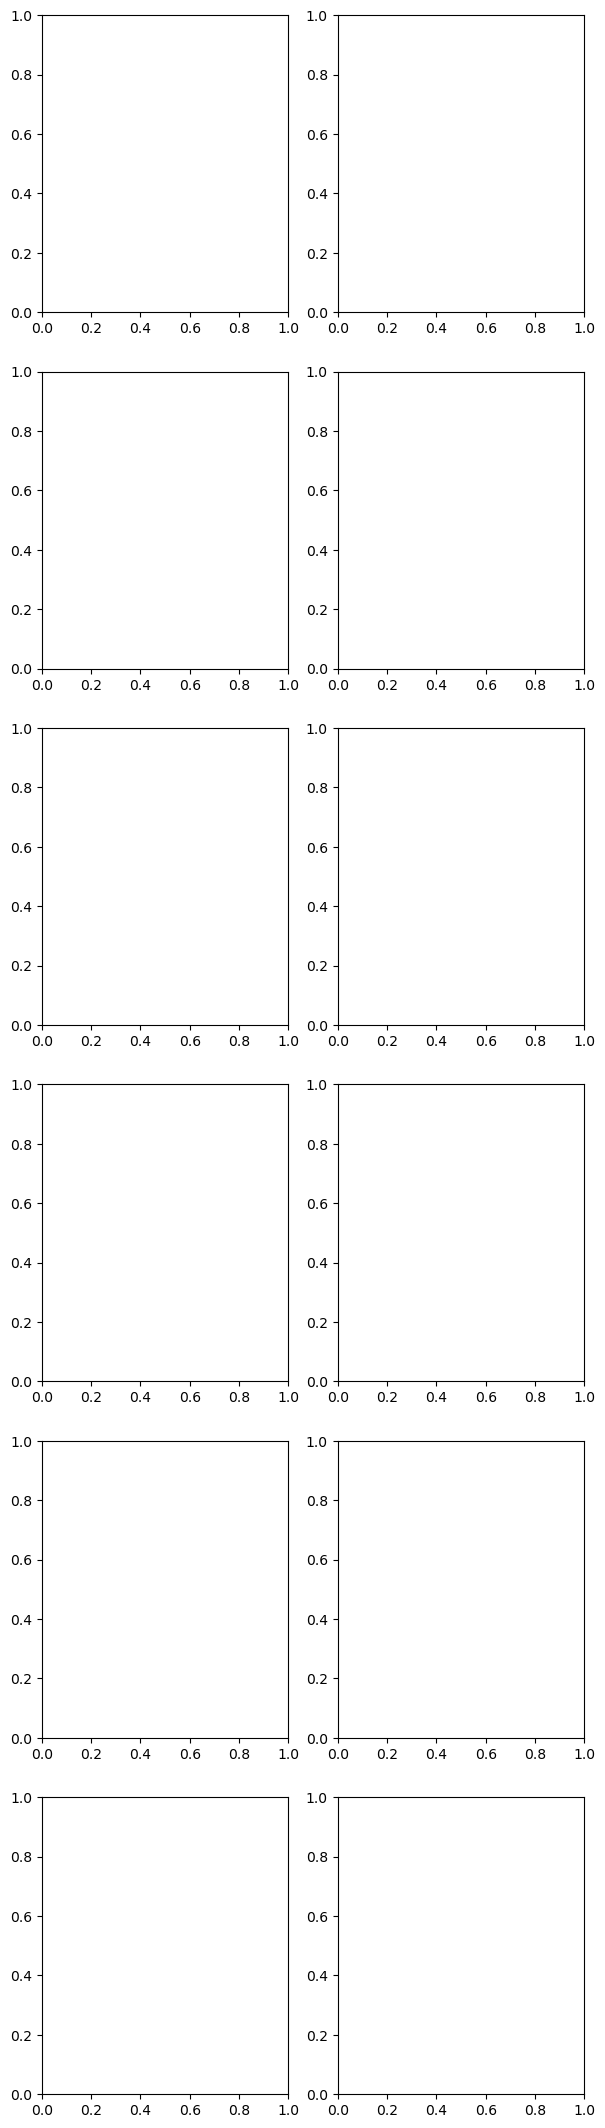

In [26]:
# # set up plot information for MUSE zooms
# # set up plots, wcs information, and HII maps for contours.
plt.clf()
plt.rcParams['hatch.color'] = 'greenyellow'
current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

for i in range(len(data)):
    galaxy=data["galaxy"][i]
#     if len(data["sn_name"][i] > 1):
        
    sn_ra   = [float(x.strip(' []')) for x in data["sn_ra"][i].split(',')]
    sn_dec  = [float(x.strip(' []')) for x in data["sn_dec"][i].split(',')]
    sn_name = [x.strip(' []') for x in data["sn_name"][i].split(',')]
    sn_type = [x.strip(' []') for x in data["sn_type"][i].split(',')]

    for j in range(len(sn_ra)):
        plots, co_maps, eco_maps, sigma, wcs, wcsIrac, wcsJWST200, wcsJWST300, wcsJWST335, wcsJWST360, wcsJWST770, wcsJWST1000, wcsJWST1130, wcsJWST2100, HIImaps, HSTmaps, HIIhst, IRACmaps, JWST200s, JWST300s, JWST335s, JWST360s, JWST770s, JWST1000s, JWST1130s, JWST2100s, hdus, wcsHST, hduHST, dists = getPlotStuff(data["galaxy"][i], data["maps_nat"][i], data["maps_HST"][i], data["maps_HII"][i], data["maps_CO_fine"][i], data["maps_eCO_fine"][i], data["maps_irac"][i], data["JWST200"][i],data["JWST300"][i],data["JWST335"][i],data["JWST360"][i],data["JWST770"][i],data["JWST1000"][i],data["JWST1130"][i],data["JWST2100"][i], sn_name[j], sn_type[j], sn_ra[j], sn_dec[j], data["distance"][i], ext=ext)

        fig, axs = plt.subplots(6,2,figsize=(7,27))

        #set up data to use astropy's cutout2D to plot subsections of galaxy map
        logData = np.log10(plots)
        HIIData = HIImaps
        HSTdata = HSTmaps
    #     logHST = np.log10(HSTdata)
        sigData = sigma
        coData = co_maps
        ecoData = eco_maps
        HIIhstData = HIIhst
        iracData = IRACmaps
        JWST200Data = JWST200s
        JWST300Data = JWST300s
        JWST335Data = JWST335s
        JWST360Data = JWST360s
        JWST770Data = JWST770s
        JWST1000Data = JWST1000s
        JWST1130Data = JWST1130s
        JWST2100Data = JWST2100s     

        halfBox = findAngSize(500,dists)/2. # 500 pc in decimal degrees/2?
        #cutout2D needs skycoord position to carry units
        ra, dec = Angle(sn_ra[j] * u.degree), Angle(sn_dec[j] * u.degree)
        raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
        position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
        size = u.Quantity((findAngSize(500,dists),findAngSize(500,dists)), u.degree) #size is size of box in arcsec 
#         size = size*6
        # make 2D cutout, will assign a new wcs to cutout to keep track of coords
        cutout = Cutout2D(logData, position, size, wcs) 
        # use this new wcs when converting to pixels to add additional details to plot
        xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
        # get HII data for contours
        HIICutout = Cutout2D(HIIData, position, size, wcs)
        HIICutoutHST = Cutout2D(HIIhstData, position, size, wcsHST)
        sigCutout = Cutout2D(sigData, position, size, wcs)
        coCutout  = Cutout2D(coData, position, size, wcs)    
        ecoCutout = Cutout2D(ecoData, position, size, wcs)    
        HSTCutout = Cutout2D(HSTdata, position, size, wcsHST)
        xvalHST, yvalHST = HSTCutout.wcs.wcs_world2pix(ra,dec, 0)
        iracCutout = Cutout2D(iracData, position, size, wcsIrac)
        JWST200Cutout  = Cutout2D(JWST200Data, position, size, wcsJWST200)
        JWST300Cutout  = Cutout2D(JWST300Data, position, size, wcsJWST300)
        JWST335Cutout  = Cutout2D(JWST335Data, position, size, wcsJWST335)
        JWST360Cutout  = Cutout2D(JWST360Data, position, size, wcsJWST360)
        JWST770Cutout  = Cutout2D(JWST770Data, position, size, wcsJWST770)
        JWST1000Cutout = Cutout2D(JWST1000Data, position, size, wcsJWST1000)
        JWST1130Cutout = Cutout2D(JWST1130Data, position, size, wcsJWST1130)
        JWST2100Cutout = Cutout2D(JWST2100Data, position, size, wcsJWST2100)
        xvalJWST200, yvalJWST200 = JWST200Cutout.wcs.wcs_world2pix(ra,dec, 0)
        xvalJWST300, yvalJWST300 = JWST300Cutout.wcs.wcs_world2pix(ra,dec, 0)
        xvalJWST335, yvalJWST335 = JWST335Cutout.wcs.wcs_world2pix(ra,dec, 0)
        xvalJWST360, yvalJWST360 = JWST360Cutout.wcs.wcs_world2pix(ra,dec, 0)
        xvalJWST770, yvalJWST770 = JWST770Cutout.wcs.wcs_world2pix(ra,dec, 0)
        xvalJWST1000, yvalJWST1000 = JWST1000Cutout.wcs.wcs_world2pix(ra,dec, 0)
        xvalJWST1130, yvalJWST1130 = JWST1130Cutout.wcs.wcs_world2pix(ra,dec, 0)
        xvalJWST2100, yvalJWST2100 = JWST2100Cutout.wcs.wcs_world2pix(ra,dec, 0)

        xvalIRAC, yvalIRAC = iracCutout.wcs.wcs_world2pix(ra,dec, 0)



        titleStr = sn_name[j].upper().strip("'") + " (" + galaxy.upper() + ") Type " + sn_type[j].strip("'")

        # make plot
        fig.suptitle(titleStr, fontsize=18) 
        #MUSE
        axs[0][0].set_title("MUSE", fontsize=14)
        axs[0][0].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(cutout.data, 5), vmax=np.percentile(cutout.data, 95),interpolation = "nearest", zorder = 0)
        axs[0][0].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
        axs[0][0].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[0][0].set_ylabel(" ")
        axs[0][0].set_xlabel(" ")
        axs[0][0].set_xticklabels([])
        axs[0][0].set_yticklabels([])
        axs[0][0].tick_params(axis = "both", direction = "in", length = 0)
        axs[0][0].contourf(HIICutout.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
        axs[0][0].contour(HIICutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)
        #HST
        axs[0][1].set_title("HST", fontsize=14)
        axs[0][1].imshow(HSTCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(HSTCutout.data, 5), vmax=np.percentile(HSTCutout.data,95),interpolation = "nearest", zorder = 0)
        axs[0][1].scatter(xvalHST, yvalHST, color = "black", marker ="o", s = 60, zorder=2)
        axs[0][1].scatter(xvalHST, yvalHST, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[0][1].set_ylabel(" ")
        axs[0][1].set_xlabel(" ")
        axs[0][1].set_xticklabels([])
        axs[0][1].set_yticklabels([])
        axs[0][1].tick_params(axis = "both", direction = "in", length = 0)
        axs[0][1].contourf(HIICutoutHST.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
        axs[0][1].contour(HIICutoutHST.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)
        #ALMA
        axs[1][0].set_title("ALMA", fontsize=14)
        axs[1][0].imshow(coCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(coCutout.data, 5), vmax=np.percentile(coCutout.data, 95),interpolation = "nearest", zorder = 0)
        axs[1][0].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
        axs[1][0].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[1][0].set_ylabel(" ")
        axs[1][0].set_xlabel(" ")
        axs[1][0].set_xticklabels([])
        axs[1][0].set_yticklabels([])
        axs[1][0].contourf(sigCutout.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
        axs[1][0].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)
        axs[1][0].tick_params(axis = "both", direction = "in", length = 0)
        #IRAC
        axs[1][1].set_title("IRAC", fontsize=14)
#         axs[1][1].imshow(iracData, cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[1][1].imshow(iracCutout.data, cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
#         axs[1][1].imshow(iracCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(iracCutout.data, 5), vmax=np.percentile(iracCutout.data,95),interpolation = "nearest", zorder = 0)
        axs[1][1].scatter(xvalIRAC, yvalIRAC, color = "black", marker ="o", s = 60, zorder=2)
        axs[1][1].scatter(xvalIRAC, yvalIRAC, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[1][1].set_ylabel(" ")
        axs[1][1].set_xlabel(" ")
        axs[1][1].set_xticklabels([])
        axs[1][1].set_yticklabels([])
        axs[1][1].tick_params(axis = "both", direction = "in", length = 0)
        #JWST200
        axs[2][0].set_title("JWST NIRCam F200W", fontsize=14)
        axs[2][0].imshow(np.log10(JWST200Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[2][0].scatter(xvalJWST200, yvalJWST200, color = "black", marker ="o", s = 60, zorder=2)
        axs[2][0].scatter(xvalJWST200, yvalJWST200, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[2][0].set_ylabel(" ")
        axs[2][0].set_xlabel(" ")
        axs[2][0].set_xticklabels([])
        axs[2][0].set_yticklabels([])
        axs[2][0].tick_params(axis = "both", direction = "in", length = 0)
        #JWST300
        axs[2][1].set_title("JWST NIRCam F300M", fontsize=14)
        axs[2][1].imshow(np.log10(JWST300Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[2][1].scatter(xvalJWST300, yvalJWST300, color = "black", marker ="o", s = 60, zorder=2)
        axs[2][1].scatter(xvalJWST300, yvalJWST300, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[2][1].set_ylabel(" ")
        axs[2][1].set_xlabel(" ")
        axs[2][1].set_xticklabels([])
        axs[2][1].set_yticklabels([])
        axs[2][1].tick_params(axis = "both", direction = "in", length = 0)
        #JWST335
        axs[3][0].set_title("JWST NIRCam F335M", fontsize=14)
        axs[3][0].imshow(np.log10(JWST335Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[3][0].scatter(xvalJWST335, yvalJWST335, color = "black", marker ="o", s = 60, zorder=2)
        axs[3][0].scatter(xvalJWST335, yvalJWST335, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[3][0].set_ylabel(" ")
        axs[3][0].set_xlabel(" ")
        axs[3][0].set_xticklabels([])
        axs[3][0].set_yticklabels([])
        axs[3][0].tick_params(axis = "both", direction = "in", length = 0)
        #JWST360
        axs[3][1].set_title("JWST NIRCam F360M", fontsize=14)
        axs[3][1].imshow(np.log10(JWST360Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[3][1].scatter(xvalJWST360, yvalJWST360, color = "black", marker ="o", s = 60, zorder=2)
        axs[3][1].scatter(xvalJWST360, yvalJWST360, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[3][1].set_ylabel(" ")
        axs[3][1].set_xlabel(" ")
        axs[3][1].set_xticklabels([])
        axs[3][1].set_yticklabels([])
        axs[3][1].tick_params(axis = "both", direction = "in", length = 0)
        #JWST770
        axs[4][0].set_title("JWST MIRI F770W", fontsize=14)
        axs[4][0].imshow(np.log10(JWST770Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[4][0].scatter(xvalJWST770, yvalJWST770, color = "black", marker ="o", s = 60, zorder=2)
        axs[4][0].scatter(xvalJWST770, yvalJWST770, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[4][0].set_ylabel(" ")
        axs[4][0].set_xlabel(" ")
        axs[4][0].set_xticklabels([])
        axs[4][0].set_yticklabels([])
        axs[4][0].tick_params(axis = "both", direction = "in", length = 0)
        #JWST1000
        axs[4][1].set_title("JWST MIRI F1000W", fontsize=14)
        axs[4][1].imshow(np.log10(JWST1000Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[4][1].scatter(xvalJWST1000, yvalJWST1000, color = "black", marker ="o", s = 60, zorder=2)
        axs[4][1].scatter(xvalJWST1000, yvalJWST1000, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[4][1].set_ylabel(" ")
        axs[4][1].set_xlabel(" ")
        axs[4][1].set_xticklabels([])
        axs[4][1].set_yticklabels([])
        axs[4][1].tick_params(axis = "both", direction = "in", length = 0)
        #JWST1130
        axs[5][0].set_title("JWST MIRI F1130W", fontsize=14)
        axs[5][0].imshow(np.log10(JWST1130Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[5][0].scatter(xvalJWST1130, yvalJWST1130, color = "black", marker ="o", s = 60, zorder=2)
        axs[5][0].scatter(xvalJWST1130, yvalJWST1130, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[5][0].set_ylabel(" ")
        axs[5][0].set_xlabel(" ")
        axs[5][0].set_xticklabels([])
        axs[5][0].set_yticklabels([])
        axs[5][0].tick_params(axis = "both", direction = "in", length = 0)
        #JWST2100
        axs[5][1].set_title("JWST MIRI F2100W", fontsize=14)
        axs[5][1].imshow(np.log10(JWST2100Cutout.data), cmap=current_cmap, aspect="equal", origin = "lower",interpolation = "nearest", zorder = 0)
        axs[5][1].scatter(xvalJWST2100, yvalJWST2100, color = "black", marker ="o", s = 60, zorder=2)
        axs[5][1].scatter(xvalJWST2100, yvalJWST2100, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
        axs[5][1].set_ylabel(" ")
        axs[5][1].set_xlabel(" ")
        axs[5][1].set_xticklabels([])
        axs[5][1].set_yticklabels([])
        axs[5][1].tick_params(axis = "both", direction = "in", length = 0)


        plt.tight_layout(pad=0.4, w_pad=0, h_pad=0.2)
        plt.show()
        figname = "../Figures/" + galaxy.upper() +"_" + sn_name[j] + ".png"
        fig.savefig(figname, dpi=300)
        plt.close()
        plt.clf()


In [ ]:
ngc1087_miri_lv3_f2100w_i2d_anchor_atgauss0p85.fits

In [ ]:
resPC = [71,82,109,109,109,109,82,69,69,69,90,90,58,58,58,58,58,57,57,57,57,64,64,64,64,64,64,64,85,85,85,85,85]
len(resPC)
print(data["galaxy"][4])

In [ ]:
# plt.rcParams['hatch.color'] = 'greenyellow'
# numPixels, numHIIPixels = [],[]

# current_cmap = plt.get_cmap("magma")
# current_cmap.set_bad("black")

# NUM_SNE= 33

# fig, axs = plt.subplots(2,2,figsize=(7,9))

# # for j in range(len(sn_gals)): # counter to count galaxy maps
# for j in range(0,1):
    
#     #set up legend label with type classification
#     if sn_types[j] != "Unclassified":
#         leglab = "Type " + sn_types[j].strip("'")
#     else:
#         leglab= sn_types[j]
#     legStr = str(resPC[j]) + " pc"
    
#     #set up data to use astropy's cutout2D to plot subsections of galaxy map
#     data = plots[j]
#     logData = np.log10(data)
#     HIIData = HIImaps[j]
#     HSTdata = HSTmaps[j]
# #     logHST = np.log10(HSTdata)
#     sigData = sigma[j]
#     coData = co_maps[j]
#     ecoData = eco_maps[j]
#     HIIhstData = HIIhst[j]

#     wcs=wcss[j]

#     halfBox = findAngSize(500,dists[j])/2. # 500 pc in decimal degrees/2?
#     #cutout2D needs skycoord position to carry units
#     ra, dec = Angle(sn_ras[j] * u.degree), Angle(sn_decs[j] * u.degree)
#     raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
#     position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
#     size = u.Quantity((findAngSize(500,dists[j]),findAngSize(500,dists[j])), u.degree) #size is size of box in arcsec 
#     # make 2D cutout, will assign a new wcs to cutout to keep track of coords
#     cutout = Cutout2D(logData, position, size, wcs) 
#     # use this new wcs when converting to pixels to add additional details to plot
#     xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
#     # get HII data for contours
#     HIICutout = Cutout2D(HIIData, position, size, wcs)
#     HIICutoutHST = Cutout2D(HIIhstData, position, size, wcsHST[j])
#     sigCutout = Cutout2D(sigData, position, size, wcs)
#     coCutout  = Cutout2D(coData, position, size, wcs)    
#     ecoCutout = Cutout2D(ecoData, position, size, wcs)    
#     HSTCutout = Cutout2D(HSTdata, position, size, wcsHST[j])
#     xvalHST, yvalHST = HSTCutout.wcs.wcs_world2pix(ra,dec, 0)

#     titleStr = sn_names[j].upper().strip("'") + " (" + sn_gals[j].upper() + ") Type " + sn_types[j].strip("'")
            
#     # make plot
#     fig.suptitle(titleStr, fontsize=18) 
#     axs[0][0].set_title("MUSE", fontsize=14)
#     axs[0][0].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(cutout.data, 5), vmax=np.percentile(cutout.data, 95),interpolation = "nearest", zorder = 0)
#     axs[0][0].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
#     axs[0][0].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#     axs[0][0].set_ylabel(" ")
#     axs[0][0].set_xlabel(" ")
#     axs[0][0].set_xticklabels([])
#     axs[0][0].set_yticklabels([])
#     axs[0][0].tick_params(axis = "both", direction = "in", length = 0)
#     axs[0][1].set_title("HST", fontsize=14)
#     axs[0][1].imshow(HSTCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(HSTCutout.data, 5), vmax=np.percentile(HSTCutout.data,95),interpolation = "nearest", zorder = 0)
#     axs[0][1].scatter(xvalHST, yvalHST, color = "black", marker ="o", s = 60, zorder=2)
#     axs[0][1].scatter(xvalHST, yvalHST, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#     axs[0][1].set_ylabel(" ")
#     axs[0][1].set_xlabel(" ")
#     axs[0][1].set_xticklabels([])
#     axs[0][1].set_yticklabels([])
#     axs[0][1].tick_params(axis = "both", direction = "in", length = 0)
    

#     axs[0][0].contourf(HIICutout.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#     axs[0][0].contour(HIICutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)
#     axs[0][1].contourf(HIICutoutHST.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#     axs[0][1].contour(HIICutoutHST.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)

    
#     axs[1][0].set_title("CO (2-1)", fontsize=14)
#     axs[1][0].imshow(coCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(coCutout.data, 5), vmax=np.percentile(coCutout.data, 95),interpolation = "nearest", zorder = 0)
#     axs[1][0].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
#     axs[1][0].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#     axs[1][0].set_ylabel(" ")
#     axs[1][0].set_xlabel(" ")
#     axs[1][0].set_xticklabels([])
#     axs[1][0].set_yticklabels([])
#     axs[1][0].tick_params(axis = "both", direction = "in", length = 0)
#     axs[1][1].set_title("S/N CO (2-1)", fontsize=14)
#     axs[1][1].imshow(sigCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(sigCutout.data, 5), vmax=np.percentile(sigCutout.data,95),interpolation = "nearest", zorder = 0)
#     axs[1][1].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
#     axs[1][1].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#     axs[1][1].set_ylabel(" ")
#     axs[1][1].set_xlabel(" ")
#     axs[1][1].set_xticklabels([])
#     axs[1][1].set_yticklabels([])
#     axs[1][1].tick_params(axis = "both", direction = "in", length = 0)
    

#     axs[1][0].contourf(sigCutout.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#     axs[1][0].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)
    
# #     axs[1][1].contourf(HIICutoutHST.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
# #     axs[1][1].contour(HIICutoutHST.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)

    
    
    
# plt.tight_layout(pad=0.4, w_pad=0, h_pad=0.2)
# plt.show()
# fig.savefig("../Figures/HST_MUSE_CO_Comp.png", dpi=300)
# plt.close()

In [ ]:
# fig = plt.figure(constrained_layout=True, figsize=(10,200))

# i=0

# comp = [0,1,4,6,7,8,9,10,11,13,14,15,20,28,29,31,32]


# # create 3x1 subfigs
# subfigs = fig.subfigures(nrows=len(comp), ncols=1)
# print(subfigs)

# for row, subfig in enumerate(subfigs):
#     titleStr = sn_names[comp[i]].upper().strip("'") + " (" + sn_gals[comp[i]].upper() + ") Type " + sn_types[comp[i]].strip("'")
#     subfig.suptitle(titleStr, fontsize=18)
    
#     #set up data to use astropy's cutout2D to plot subsections of galaxy map
#     data = plots[comp[i]]
#     logData = np.log10(data)
#     HIIData = HIImaps[comp[i]]
#     HSTdata = HSTmaps[comp[i]]
#     HIIhstData = HIIhst[comp[i]]
#     sigData = sigma[comp[i]]
#     coData = co_maps[comp[i]]
#     ecoData = eco_maps[comp[i]]

#     wcs=wcss[comp[i]]
    
#     halfBox = findAngSize(500,dists[comp[i]])/2. # 500 pc in decimal degrees/2?
#     #cutout2D needs skycoord position to carry units
#     ra, dec = Angle(sn_ras[comp[i]] * u.degree), Angle(sn_decs[comp[i]] * u.degree)
#     raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
#     position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
#     size = u.Quantity((findAngSize(500,dists[comp[i]]),findAngSize(500,dists[comp[i]])), u.degree) #size is size of box in arcsec 
#     # make 2D cutout, will assign a new wcs to cutout to keep track of coords
#     cutout = Cutout2D(logData, position, size, wcs) 
#     # use this new wcs when converting to pixels to add additional details to plot
#     xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
#     # get HII data for contours
#     HIICutout = Cutout2D(HIIData, position, size, wcs)
#     HIICutoutHST = Cutout2D(HIIhstData, position, size, wcsHST[comp[i]])
#     HSTCutout = Cutout2D(HSTdata, position, size, wcsHST[comp[i]])
#     xvalHST, yvalHST = HSTCutout.wcs.wcs_world2pix(ra,dec, 0)
#     sigCutout = Cutout2D(sigData, position, size, wcs)
#     coCutout  = Cutout2D(coData, position, size, wcs)    
#     ecoCutout = Cutout2D(ecoData, position, size, wcs) 

#     # create 1x3 subplots per subfig
#     axs = subfig.subplots(nrows=2, ncols=2)
#     for row, col in enumerate(axs):
#         axs[0][0].set_title("MUSE", fontsize=14)
#         axs[0][0].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(cutout.data, 5), vmax=np.percentile(cutout.data, 95),interpolation = "nearest", zorder = 0)
#         axs[0][0].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
#         axs[0][0].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#         axs[0][0].set_ylabel(" ")
#         axs[0][0].set_xlabel(" ")
#         axs[0][0].set_xticklabels([])
#         axs[0][0].set_yticklabels([])
#         axs[0][0].tick_params(axis = "both", direction = "in", length = 0)
#         axs[0][1].set_title("HST", fontsize=14)
#         axs[0][1].imshow(HSTCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(HSTCutout.data, 5), vmax=np.percentile(HSTCutout.data,95),interpolation = "nearest", zorder = 0)
#         axs[0][1].scatter(xvalHST, yvalHST, color = "black", marker ="o", s = 60, zorder=2)
#         axs[0][1].scatter(xvalHST, yvalHST, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#         axs[0][1].set_ylabel(" ")
#         axs[0][1].set_xlabel(" ")
#         axs[0][1].set_xticklabels([])
#         axs[0][1].set_yticklabels([])
#         axs[0][1].tick_params(axis = "both", direction = "in", length = 0)


#         axs[0][0].contourf(HIICutout.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#         axs[0][0].contour(HIICutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)
#         axs[0][1].contourf(HIICutoutHST.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#         axs[0][1].contour(HIICutoutHST.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)


#         axs[1][0].set_title("CO (2-1)", fontsize=14)
#         axs[1][0].imshow(coCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(coCutout.data, 5), vmax=np.percentile(coCutout.data, 95),interpolation = "nearest", zorder = 0)
#         axs[1][0].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
#         axs[1][0].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#         axs[1][0].set_ylabel(" ")
#         axs[1][0].set_xlabel(" ")
#         axs[1][0].set_xticklabels([])
#         axs[1][0].set_yticklabels([])
#         axs[1][0].tick_params(axis = "both", direction = "in", length = 0)
#         axs[1][1].set_title("S/N CO (2-1)", fontsize=14)
#         axs[1][1].imshow(sigCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(sigCutout.data, 5), vmax=np.percentile(sigCutout.data,95),interpolation = "nearest", zorder = 0)
#         axs[1][1].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
#         axs[1][1].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#         axs[1][1].set_ylabel(" ")
#         axs[1][1].set_xlabel(" ")
#         axs[1][1].set_xticklabels([])
#         axs[1][1].set_yticklabels([])
#         axs[1][1].tick_params(axis = "both", direction = "in", length = 0)


#         axs[1][0].contourf(sigCutout.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#         axs[1][0].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=2, zorder = 1)



#     i+=1
#     print(i)
# plt.tight_layout(pad=0.4, w_pad=0, h_pad=0.2)
# plt.show()
# fig.savefig("../Figures/MUSE_HST_CO_Zooms_500pc.png", dpi=300)
# plt.close()


In [ ]:
# fig = plt.figure(constrained_layout=True, figsize=(10,100))

# i=0

# comp = [0,1,4,6,7,8,9,10,11,13,14,15,20,28,29,31,32]


# # create 3x1 subfigs
# subfigs = fig.subfigures(nrows=len(comp), ncols=1)

# for row, subfig in enumerate(subfigs):
#     titleStr = sn_names[comp[i]].upper().strip("'") + " (" + sn_gals[comp[i]].upper() + ") Type " + sn_types[comp[i]].strip("'")
#     subfig.suptitle(titleStr, fontsize=18)
    
#     #set up data to use astropy's cutout2D to plot subsections of galaxy map
#     data = plots[comp[i]]
#     logData = np.log10(data)
#     HIIData = HIImaps[comp[i]]
#     HSTdata = HSTmaps[comp[i]]
#     HIIhstData = HIIhst[comp[i]]

#     wcs=wcss[comp[i]]

#     halfBox = findAngSize(500,dists[comp[i]])/2. # 500 pc in decimal degrees/2?
#     #cutout2D needs skycoord position to carry units
#     ra, dec = Angle(sn_ras[comp[i]] * u.degree), Angle(sn_decs[comp[i]] * u.degree)
#     raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
#     position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
#     size = u.Quantity((findAngSize(500,dists[comp[i]]),findAngSize(500,dists[comp[i]])), u.degree) #size is size of box in arcsec 
#     # make 2D cutout, will assign a new wcs to cutout to keep track of coords
#     cutout = Cutout2D(logData, position, size, wcs) 
#     # use this new wcs when converting to pixels to add additional details to plot
#     xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
#     # get HII data for contours
#     HIICutout = Cutout2D(HIIData, position, size, wcs)
#     HIICutoutHST = Cutout2D(HIIhstData, position, size, wcsHST[comp[i]])
#     HSTCutout = Cutout2D(HSTdata, position, size, wcsHST[comp[i]])
#     xvalHST, yvalHST = HSTCutout.wcs.wcs_world2pix(ra,dec, 0)


#     # create 1x2 subplots per subfig
#     ax = subfig.subplots(nrows=1, ncols=2)
#     for col in ax:
#         ax[0].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(cutout.data, 5), vmax=np.percentile(cutout.data, 95),interpolation = "nearest", zorder = 0)
#         ax[0].scatter(xval, yval, color = "white", marker ="o", s = 60, zorder=2)
#         ax[0].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=leglab)
#         ax[0].set_title("MUSE", fontsize=14) 
#         ax[0].set_ylabel(" ")
#         ax[0].set_xlabel(" ")
#         ax[0].set_xticklabels([])
#         ax[0].set_yticklabels([])
#         ax[0].tick_params(axis = "both", direction = "in", length = 0)
        
#         ax[1].imshow(HSTCutout.data, cmap=current_cmap, aspect="equal", origin = "lower", vmin=np.percentile(HSTCutout.data, 5), vmax=np.percentile(HSTCutout.data, 95),interpolation = "nearest", zorder = 0)
#         ax[1].scatter(xvalHST, yvalHST, color = "white", marker ="o", s = 60, zorder=2)
#         ax[1].scatter(xvalHST, yvalHST, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2)
#         ax[1].set_title("HST", fontsize=14)
#         ax[1].set_ylabel(" ")
#         ax[1].set_xlabel(" ")
#         ax[1].set_xticklabels([])
#         ax[1].set_yticklabels([])
#         ax[1].tick_params(axis = "both", direction = "in", length = 0)


#         ax[0].contourf(HIICutout.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#         ax[0].contour(HIICutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=1, zorder = 1)
#         ax[1].contourf(HIICutoutHST.data, [3,1000000], colors = ["greenyellow"], linestyles = ("-"), hatches=['/'], zorder = 1, alpha=0.1)
#         ax[1].contour(HIICutoutHST.data, [3], colors = ["greenyellow"], linestyles = ("-"), linewidths=1, zorder = 1)
        
        
        
#     i+=1
# # plt.tight_layout(pad=0.5, w_pad=.8, h_pad=1.0)
# plt.show()
# fig.savefig("../Figures/MUSE_HST_Zooms_500pc.png", dpi=300)
# plt.close()